In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mamsi.mamsi_pls import MamsiPls
from mamsi.mamsi_struct_search import MamsiStructSearch



%load_ext autoreload

%autoreload 2


In [3]:
Y = pd.read_excel('~/OneDrive - Imperial College London/Data/Aligned/myDiabetes/Y_myDiabetes_noOutliers.xlsx')
y =  Y["Gender"].apply(lambda x: 1 if x == 'Female' else 0)

hpos = pd.read_excel('~/OneDrive - Imperial College London/Data/Aligned/myDiabetes/HPOS_myDiabetes_noOutliers.xlsx').add_prefix('HPOS_')
lpos = pd.read_excel('~/OneDrive - Imperial College London/Data/Aligned/myDiabetes/LPOS_myDiabetes_noOutliers.xlsx').add_prefix('LPOS_')
lneg = pd.read_excel('~/OneDrive - Imperial College London/Data/Aligned/myDiabetes/LNEG_myDiabetes_noOutliers.xlsx').add_prefix('LNEG_')


In [4]:


hpos_train, hpos_test, y_train, y_test = train_test_split(hpos, y, test_size=0.1, random_state=42) # Random State = 42

lpos_train = lpos.iloc[hpos_train.index,:]
lneg_train = lneg.iloc[hpos_train.index,:]

lpos_test = lpos.iloc[hpos_test.index,:]
lneg_test = lneg.iloc[hpos_test.index,:]

In [5]:


pls = MamsiPls(n_components=1)

pls.fit([hpos_train, lpos_train, lneg_train], y_train)

MamsiPls(n_components=1)

auc reaches bent (increase of less than 5.0 % of previous value or decrease) at component 2
auc reaches plateau at component 5
Model re-fitted with n_components = 5


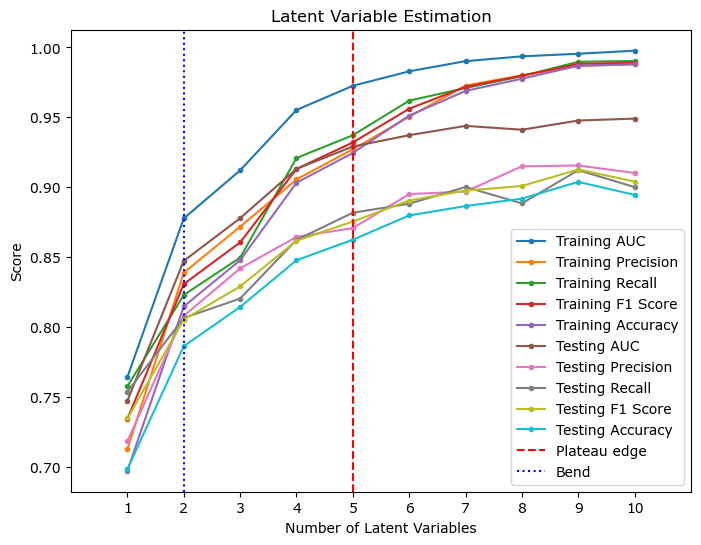

In [6]:
pls.estimate_lv([hpos_train, lpos_train, lneg_train], y_train, metric='auc')

In [7]:
pls.n_components

5

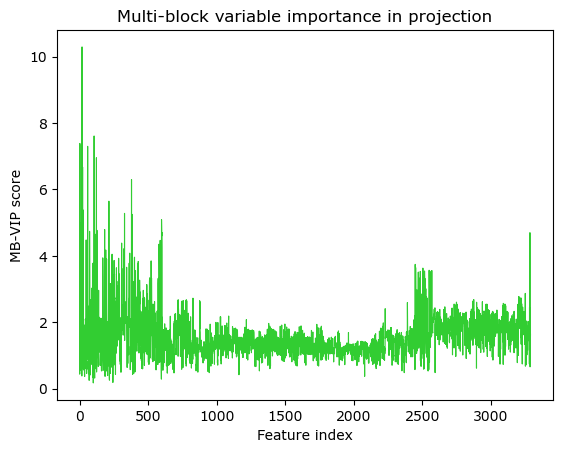

In [8]:
mb_vip = pls.mb_vip(plot=True)

Scores for model with n_components = 5

Accuracy 0.845
Precision 0.865
Recall 0.8
Specificity 0.886
F1 Score 0.831
AUC 0.919


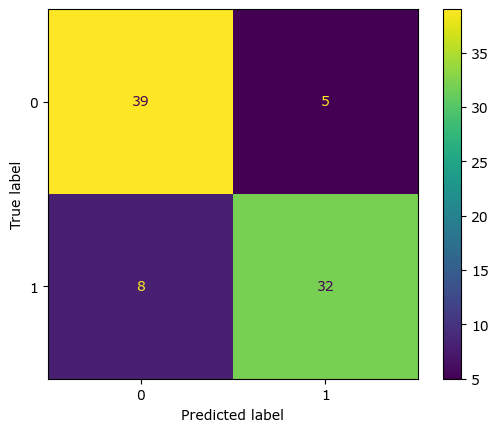

In [9]:
predicted = pls.evaluate_class_model([hpos_test, lpos_test, lneg_test], y_test.array)

In [11]:
p_vals, null_vip = pls.mb_vip_permtest([hpos_train, lpos_train, lneg_train], y_train, n_permutations=10, return_scores=True)

In [12]:
x = pd.concat([hpos_train, lpos_train, lneg_train], axis=1)

In [13]:
mask = np.where(p_vals < 0.05)

In [14]:
selected = x.iloc[:, mask[0]]

In [ ]:
ss = MamsiStructSearch(rt_win=5, ppm=10)
ss.load_lcms(selected)
ss.test_behaviour()
ss.assay_metadata[0]

In [16]:
ss = MamsiStructSearch(rt_win=5, ppm=10)
ss.load_lcms(selected)
output = ss.get_structural_clusters(annotate=True)

output[2][0]

0
1
2


,Feature,Assay,RT,m/z,Isotopologue group,Adduct cluster,Expected neutral mass,Observed neutral mass,Neutral mass |difference ppm|,Adduct
0,HPOS_152.64_114.0664m/z,HPOS,152.64,114.0664,NaN,1.0,113.059124,113.059124,0.000000,[M+H]+/[M+2H]2+
1,HPOS_152.64_115.0684m/z,HPOS,152.64,115.0684,NaN,NaN,NaN,NaN,NaN,NaN
2,HPOS_289.09_118.0867m/z,HPOS,289.09,118.0867,1.0,2.0,117.079424,117.079424,0.000000,[M+H]+
3,HPOS_289.25_119.0894m/z,HPOS,289.25,119.0894,1.0,NaN,NaN,NaN,NaN,NaN
4,HPOS_152.81_136.0483m/z,HPOS,152.81,136.0483,NaN,1.0,113.059124,113.059082,0.371487,[M+Na]+
...,...,...,...,...,...,...,...,...,...,...
69,HPOS_237.96_861.6147m/z,HPOS,237.96,861.6147,NaN,NaN,NaN,NaN,NaN,NaN
70,HPOS_212.53_907.3297m/z,HPOS,212.53,907.3297,NaN,NaN,NaN,NaN,NaN,NaN
71,HPOS_242.51_909.6698m/z,HPOS,242.51,909.6698,NaN,NaN,NaN,NaN,NaN,NaN
72,HPOS_212.86_1042.8026m/z,HPOS,212.86,1042.8026,NaN,NaN,NaN,NaN,NaN,NaN
